<a href="https://colab.research.google.com/github/jem-thanmay/sparks06/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sparks Foundation - Data Science and Business Analytics - Task 6
Creating a Decision Tree

Thanmay Jembige

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# uploading the data into colab
data = pd.read_csv('/content/Iris (1).csv')
print("Shape: ",data.shape)
data.head()

Shape:  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# to remove the id axis we use drop() because its not important.
data.drop('Id', axis = 1 ,inplace=True)  # axis is 1 , column and axis is 0, row
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()   # gives some information about the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isnull()    # checking for missing data.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.columns  # displayes the column headers.

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data['Species'].value_counts()  # species of Iris.

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
data.describe()  # describe() is used to get statistical values like mean , std , min and max.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# applying transformations on data before feeding it to the algorithm.
from sklearn import preprocessing            # we cannot apply raw data to the algorithm therefore we use the module preprocessing.
tree = preprocessing.LabelEncoder()
tree.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
data['Species'] = tree.transform(data['Species'])

In [11]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [12]:
# splitting the given dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

In [13]:
y_train.shape

(105,)

In [14]:
x_train.shape

(105, 4)

In [15]:
x_test.shape

(45, 4)

In [16]:
# Importing Decision Tree from module DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
species = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)   # depth gives the number of terminal nodes. 
species

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
species.fit(x_train, y_train)               # fitting the training set

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
prediction = species.predict(x_test)      # to perform prediction

In [19]:
print(prediction)
print(y_test)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0 2 1 2 1 0 0 2]
47     0
3      0
31     0
25     0
15     0
118    2
89     1
6      0
103    2
65     1
88     1
38     0
92     1
53     1
140    2
40     0
72     1
135    2
113    2
42     0
126    2
112    2
141    2
76     1
5      0
109    2
134    2
67     1
57     1
86     1
14     0
24     0
139    2
58     1
8      0
27     0
77     1
41     0
111    2
68     1
128    2
82     1
22     0
17     0
127    2
Name: Species, dtype: int64


In [20]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test,prediction))

Accuracy:  0.9777777777777777


In [21]:
!pip install pydotplus         # python interface to support graphviz dot language
!pip install graphviz          # open source graphic visualization software

In [22]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [23]:
from sklearn.externals.six import StringIO     # to read and write strings as input ot output files.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


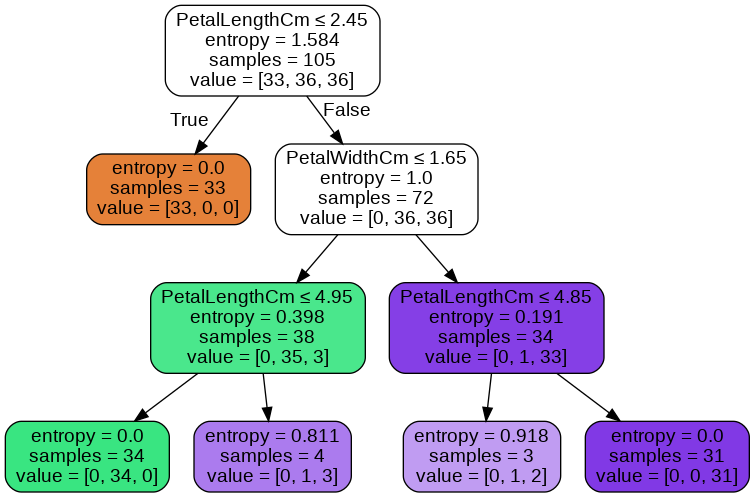

In [24]:
dot_data = StringIO()
export_graphviz(species, out_file = dot_data, feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
                filled = True , rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())